In [95]:
# OBJETIVO: Analisar de que maneira ocorre a utilização da internet nas diferentes faixas salariais nas regiões Norte e Sudeste
# (menos desenvolvida e mais desenvolvida do país)< dando enfoque a relação entre a quantidade de pessoas que possui e não possui
# acesso a internet, e analisando a forma como é mais obtido o acesso (ex: computador, tablet, wifi, 3G). Além disso,
# será analisada a evolução deste cenário ao longo dos 3 anos estudados.

In [96]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [97]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

dados = pd.read_csv('DOM2015.csv',sep=',')


Esperamos trabalhar no diretório
C:\Users\pedro\Documents\2 SEMESTRE\Ciencia dos Dados\Projeto 1


In [98]:
# REGIAO 
dados.loc[(dados.UF>30)&(dados.UF<36), 'REGIAO'] = 'Sudeste'
dados.loc[(dados.UF>35)&(dados.UF<44), 'REGIAO'] = 'Sul'
dados.loc[(dados.UF>43)&(dados.UF<54), 'REGIAO'] = 'Centro-Oeste'
dados.loc[(dados.UF>10)&(dados.UF<23), 'REGIAO'] = 'Norte'
dados.loc[(dados.UF>22)&(dados.UF<31), 'REGIAO'] = 'Nordeste'                              


#RENDIMENTO MENSAL DOMCILIAR PER CAPITA (R$)
dados.loc[(dados.V4622>-1)&(dados.V4622<1), 'Faixa_Salarial'] = 'Sem rendimento'
dados.loc[(dados.V4622>0)&(dados.V4622<2), 'Faixa_Salarial'] = 'Até 1/4 salario'
dados.loc[(dados.V4622>1)&(dados.V4622<3), 'Faixa_Salarial'] = 'Até meio salario'
dados.loc[(dados.V4622>2)&(dados.V4622<4), 'Faixa_Salarial'] = 'Meio até 1 salario'
dados.loc[(dados.V4622>3)&(dados.V4622<5), 'Faixa_Salarial'] = '1 até 2 salarios'
dados.loc[(dados.V4622>4)&(dados.V4622<6), 'Faixa_Salarial'] = '2 até 3 salarios'
dados.loc[(dados.V4622>5)&(dados.V4622<7), 'Faixa_Salarial'] = '3 até 5 salarios'
dados.loc[(dados.V4622>6)&(dados.V4622<8), 'Faixa_Salarial'] = 'Mais de 5 salarios'
dados.loc[(dados.V4622>98)&(dados.V4622<100), 'Faixa_Salarial'] = 'Não declarado'


# TEM INTERNET NO DOMICILIO ?
dados.V02322 = dados.V02322.astype('category')

dados.loc[(dados.V02322 == 2), 'INTERNET_NO_DOMICILIO'] = 'Sim'
dados.loc[(dados.V02322 == 4), 'INTERNET_NO_DOMICILIO'] = 'Não'


# BANDA LARGA
dados.V02426 = dados.V02426.astype('category')
dados.V02426.cat.categories = ('Sim', 'Não')


# 3G OU 4G
dados.V02424 = dados.V02424.astype('category')
dados.V02424.cat.categories = ('Sim', 'Não')


# ACESSA PELO Telefone Celular
dados.V02324 = dados.V02324.astype('category')
dados.V02324.cat.categories = ('Sim', 'Não')


#ACESSA PELO COMPUTADOR
dados.V0232 = dados.V0232.astype('category')
dados.V0232.cat.categories = ('Sim', 'Não')



#dados=dados.dropna(subset = ["variavel"])


In [99]:
ut1 = (dados.Faixa_Salarial.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut1

Sem rendimento         0.6
Até 1/4 salario        6.7
3 até 5 salarios       5.6
Até meio salario      15.2
Meio até 1 salario    30.3
Mais de 5 salarios     4.9
2 até 3 salarios       8.1
1 até 2 salarios      26.6
Não declarado          2.0
Name: Faixa_Salarial, dtype: float64

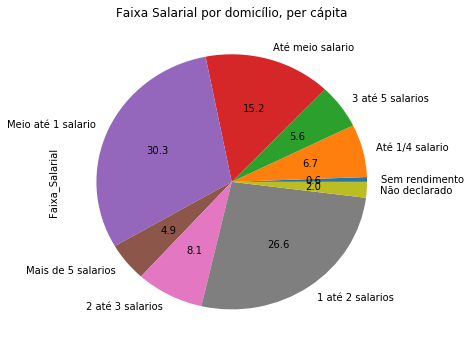

In [100]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut1.plot(kind='pie',title='Faixa Salarial por domicílio, per cápita',autopct='%.1f')


plt.tight_layout()
plt.show()

In [101]:
meioa1sal_SUDESTE = dados[(dados.Faixa_Salarial== 'Meio até 1 salario') &(dados.REGIAO == 'Sudeste')].loc[:,['REGIAO', 'Faixa_Salarial', 'INTERNET_NO_DOMICILIO']]
meioa1sal_SUDESTE.head()


,REGIAO,Faixa_Salarial,INTERNET_NO_DOMICILIO
64877,Sudeste,Meio até 1 salario,Sim
64881,Sudeste,Meio até 1 salario,Não
64885,Sudeste,Meio até 1 salario,Sim
64888,Sudeste,Meio até 1 salario,Sim
64890,Sudeste,Meio até 1 salario,Não


In [102]:
# Criando tabelas com renda em valor quantitativo para poder plotar histograma
sudeste = dados[(dados.REGIAO == 'Sudeste')].loc[:,['REGIAO', 'V4621', 'INTERNET_NO_DOMICILIO']]
norte = dados[(dados.REGIAO == 'Norte')].loc[:,['REGIAO', 'V4621', 'INTERNET_NO_DOMICILIO']]

In [103]:
ut2 = (meioa1sal_SUDESTE.INTERNET_NO_DOMICILIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut2

Sim    56.2
Não    43.8
Name: INTERNET_NO_DOMICILIO, dtype: float64

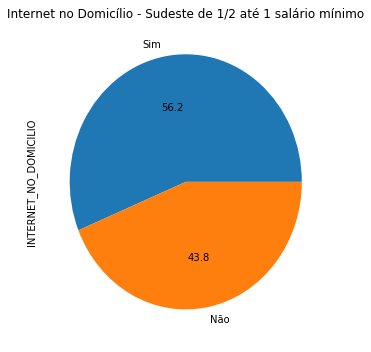

In [105]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut2.plot(kind='pie',title='Internet no Domicílio - Sudeste de 1/2 até 1 salário mínimo',autopct='%.1f')


plt.tight_layout()
plt.show()

In [106]:
# AGORA ANALISANDO A REGIÃO NORTE DO PAÍS (mesma faixa salarial)
#EM COMPARAÇÃO COM O SUDESTE

meioa1sal_NORTE = dados[(dados.Faixa_Salarial== 'Meio até 1 salario') &(dados.REGIAO == 'Norte')].loc[:,['REGIAO', 'Faixa_Salarial', 'INTERNET_NO_DOMICILIO']]
meioa1sal_NORTE.head()


,REGIAO,Faixa_Salarial,INTERNET_NO_DOMICILIO
15,Norte,Meio até 1 salario,Sim
16,Norte,Meio até 1 salario,Não
17,Norte,Meio até 1 salario,Sim
19,Norte,Meio até 1 salario,Sim
26,Norte,Meio até 1 salario,Não


In [107]:
ut3 = (meioa1sal_NORTE.INTERNET_NO_DOMICILIO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut3

Não    57.6
Sim    42.4
Name: INTERNET_NO_DOMICILIO, dtype: float64

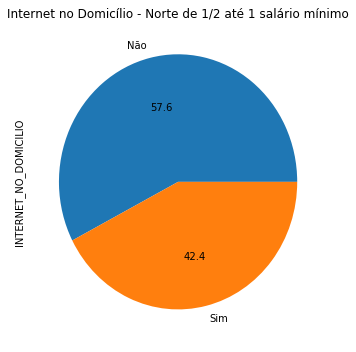

In [108]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut3.plot(kind='pie',title='Internet no Domicílio - Norte de 1/2 até 1 salário mínimo',autopct='%.1f')


plt.tight_layout()
plt.show()

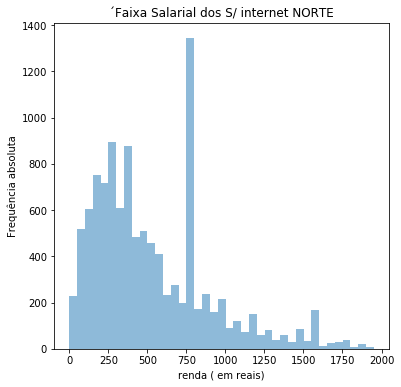

In [116]:
#Histograma de faixa salarial de quem não tem internet no domicílio Norte
faixa = arange(0.5,2000,50)


norte.V4621[norte.INTERNET_NO_DOMICILIO=='Não'].plot.hist(bins=faixa, title='´Faixa Salarial dos S/ internet NORTE', figsize=(6,6), alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda ( em reais)')
plt.show()

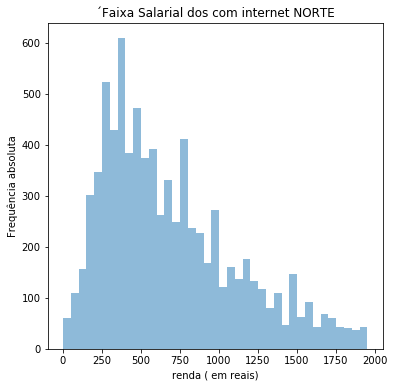

In [117]:
#Histograma de faixa salarial de quem tem internet no domicílio no NORTE
norte.V4621[norte.INTERNET_NO_DOMICILIO=='Sim'].plot.hist(bins=faixa, title='´Faixa Salarial dos com internet NORTE', figsize=(6,6), alpha=0.5)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda ( em reais)')
plt.show()